In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def create_cmap(color1, color2, color3):
    colors = [color1, color2, color3]
    cmap_name = 'list'
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors)
    return cmap

def lorenz(t, state, par): 
    σ, ρ, β = par
    x, y, z = state
    ẋ = σ * (y - x)
    ẏ = (x * (ρ - z)) - y
    ż = (x * y) - (β * z)
    dx = np.array((ẋ, ẏ, ż))
    return dx

def get_lorenz_data(tspan):
    σ, ρ, β = 10, 28, 8 / 3 # chaotic parameters 
    initial = np.array([-8, 8, 27]) # initial condition 
    data = np.empty((3, len(tspan)))
    data[:, 0] = initial
    r = ode(lorenz).set_integrator('dopri5')
    r.set_initial_value(initial, tspan[0])
    r.set_f_params((σ, ρ, β))
    for i, t in enumerate(tspan):
        if i == 0:
            continue
        r.integrate(t)
        data[:, i] = r.y
    return data 

In [3]:
# Generate Lorenz data 
dt = 0.0001
tmin = 0.0
tmax = 40.0
tspan = np.arange(tmin, tmax + dt, dt)
data = get_lorenz_data(tspan)

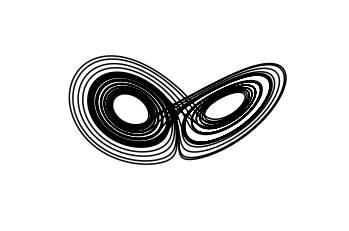

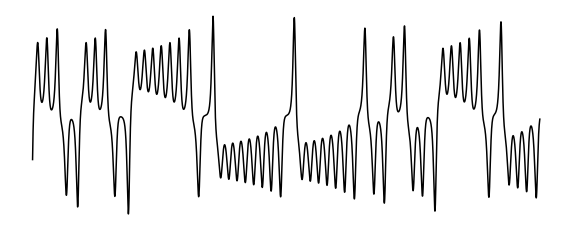

In [4]:
# Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=data[0,:], ys=data[1,:], zs=data[2,:], color='k')
plt.axis('off')
plt.savefig('pdf_files/fig2a.pdf',bbox_inches = "tight")

# Lorenz time series 
plt.figure(figsize=(10,4))
plt.plot(data[0,:],'k')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('pdf_files/fig2b.pdf',bbox_inches = "tight")

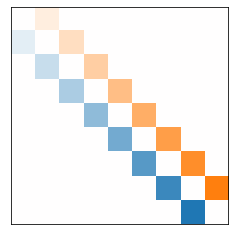

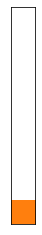

In [5]:
# Linear dynamics
np.random.seed(4)
plt.figure()
vals = np.array([1, 2, 3, 4, 5, 6, 7, 8])
plt.imshow(np.diag(vals,1) + np.diag(-vals,-1), cmap=create_cmap('tab:blue','white','tab:orange'))
plt.xticks([])
plt.yticks([])
plt.savefig('pdf_files/fig2c.pdf', bbox_inches='tight')

# Forcing 
np.random.seed(4)
plt.figure()
a = np.zeros(9)
a[-1] = 10
plt.imshow(a[:,np.newaxis], cmap=create_cmap('white','tab:blue','tab:orange'))
plt.xticks([])
plt.yticks([])
plt.savefig('pdf_files/fig2d.pdf', bbox_inches='tight')

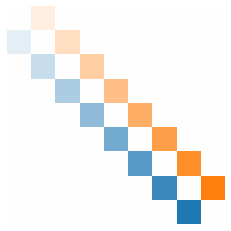

In [6]:
# Linear dynamics
np.random.seed(4)
plt.figure()
vals = np.array([1, 2, 3, 4, 5, 6, 7, 8])
plt.imshow(np.diag(vals,1) + np.diag(-vals,-1), cmap=create_cmap('tab:blue','white','tab:orange'))
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('pdf_files/fig1a.pdf', bbox_inches='tight')